In [98]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras  
import pandas as pd

In [99]:
dataset = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset1 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos


In [100]:
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

dataset1.replace([np.inf, -np.inf], -1, inplace=True) 
dataset1.replace([np.nan, -np.nan], -1, inplace=True)

In [101]:
# Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)
dataset1 = dataset1.drop(dataset1[dataset1['Dst Port']=='Dst Port'].index)

#Eliminamos las columnas innecesarias
dataset["Label"]=dataset['Flow IAT Min']
dataset1["Label"]=dataset1['Flow IAT Min']

dataset1.loc[(dataset1.Label >= 0),'Label']='Bien'
dataset.loc[(dataset.Label >= 0),'Label']='Bien'

dataset1.loc[(dataset1.Label !='Bien'),'Label']='Mal'
dataset.loc[(dataset.Label !='Bien'),'Label']='Mal'


dataset = dataset.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Flow IAT Min'], axis=1)
dataset1 = dataset1.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Flow IAT Min'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset1 = dataset1.drop(['Timestamp'], axis=1)
dataset = dataset.drop(['Timestamp'], axis=1)

#dataset.rename(columns = {'Flow IAT min':'FlowMin'}, inplace = True)



#Eliminamos la columna 
dataset

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,21,6,3025021,11,15,336.0,188.0,79.0,0.0,30.545455,...,32,0,0,0,0,1.641321e+15,9.194970e+05,1.641321e+15,1.641321e+15,Bien
1,21,6,468,2,1,79.0,0.0,79.0,0.0,39.500000,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Bien
2,21,6,3054906,13,15,338.0,188.0,79.0,0.0,26.000000,...,32,0,0,0,0,1.641321e+15,9.113864e+05,1.641321e+15,1.641321e+15,Bien
3,21,6,3046116,11,15,341.0,188.0,79.0,0.0,31.000000,...,32,0,0,0,0,1.641321e+15,9.216062e+05,1.641321e+15,1.641321e+15,Bien
4,21,6,3045413,13,15,351.0,188.0,86.0,0.0,27.000000,...,32,0,0,0,0,1.641321e+15,9.112821e+05,1.641321e+15,1.641321e+15,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430151,53,17,9264,1,1,47.0,63.0,47.0,47.0,47.000000,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Bien
430152,0,0,91444297,51,0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,1.614000e+15,2.329123e+14,1.646939e+15,2.016173e+07,Bien
430153,3478,17,101164777,6,6,1332.0,1032.0,222.0,222.0,222.000000,...,8,0,0,0,0,1.646939e+15,3.197853e+07,1.646939e+15,1.646939e+15,Bien
430154,3478,17,101009912,6,6,1332.0,1032.0,222.0,222.0,222.000000,...,8,0,0,0,0,1.646939e+15,3.191661e+07,1.646939e+15,1.646939e+15,Bien


In [102]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)
        
n=0
for column in dataset1:
    column
    if column != 'Label':
        dataset1[column] = dataset1[column].astype(float)


In [103]:
#dataset.loc[(dataset.Label != 'Benign'),'Label']='Evil'
#dataset1.loc[(dataset1.Label != 'Benign'),'Label']='Evil'
# Solo se utiliza para detectar malo o bueno

#dataset = dataset.drop(dataset[dataset['Label'] == 'Evil'].sample(frac=.8).index)
#dataset1 = dataset1.drop(dataset1[dataset1['Label'] == 'Evil'].sample(frac=.8).index)

dataset

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,21.0,6.0,3025021.0,11.0,15.0,336.0,188.0,79.0,0.0,30.545455,...,32.0,0.0,0.0,0.0,0.0,1.641321e+15,9.194970e+05,1.641321e+15,1.641321e+15,Bien
1,21.0,6.0,468.0,2.0,1.0,79.0,0.0,79.0,0.0,39.500000,...,32.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Bien
2,21.0,6.0,3054906.0,13.0,15.0,338.0,188.0,79.0,0.0,26.000000,...,32.0,0.0,0.0,0.0,0.0,1.641321e+15,9.113864e+05,1.641321e+15,1.641321e+15,Bien
3,21.0,6.0,3046116.0,11.0,15.0,341.0,188.0,79.0,0.0,31.000000,...,32.0,0.0,0.0,0.0,0.0,1.641321e+15,9.216062e+05,1.641321e+15,1.641321e+15,Bien
4,21.0,6.0,3045413.0,13.0,15.0,351.0,188.0,86.0,0.0,27.000000,...,32.0,0.0,0.0,0.0,0.0,1.641321e+15,9.112821e+05,1.641321e+15,1.641321e+15,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430151,53.0,17.0,9264.0,1.0,1.0,47.0,63.0,47.0,47.0,47.000000,...,8.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Bien
430152,0.0,0.0,91444297.0,51.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.614000e+15,2.329123e+14,1.646939e+15,2.016173e+07,Bien
430153,3478.0,17.0,101164777.0,6.0,6.0,1332.0,1032.0,222.0,222.0,222.000000,...,8.0,0.0,0.0,0.0,0.0,1.646939e+15,3.197853e+07,1.646939e+15,1.646939e+15,Bien
430154,3478.0,17.0,101009912.0,6.0,6.0,1332.0,1032.0,222.0,222.0,222.000000,...,8.0,0.0,0.0,0.0,0.0,1.646939e+15,3.191661e+07,1.646939e+15,1.646939e+15,Bien


In [104]:
dataset = dataset.drop(dataset[dataset['Label'] == 'Bien'].sample(frac=.995).index)
dataset1 = dataset1.drop(dataset1[dataset1['Label'] == 'Bien'].sample(frac=.995).index)


Labels = dataset['Label'].unique()
Y_train = dataset["Label"]
Y_test =  dataset1["Label"]

In [105]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

X_train=dataset.iloc[:, 0:77] #Luego obtenemos las características del flujo
X_test=dataset1.iloc[:, 0:77]



features = list(X_train.columns)

#plt.savefig('line_plot.svg') 
#pintar solo con colores

In [106]:
from sklearn.preprocessing import LabelEncoder
 
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train) #para pasar a numeros


Labels = lb_make.inverse_transform(Y_train)
Labels = list(lb_make.classes_)
Labels

['Bien', 'Mal']

In [107]:
Y_train
unique, counts = np.unique(Y_train, return_counts=True)
counts

array([2142, 1674], dtype=int64)

In [108]:
unique

array([0, 1])

In [109]:
lb_make = LabelEncoder()
Y_test = lb_make.fit_transform(Y_test)

Labels1 = lb_make.inverse_transform(Y_test)
Labels1 = list(lb_make.classes_)
Labels1
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [110]:
dataset["Label"].value_counts()

Bien    2142
Mal     1674
Name: Label, dtype: int64

In [111]:
unique, counts = np.unique(Y_test, return_counts=True)
counts

array([509, 177], dtype=int64)

In [112]:
dataset1["Label"].value_counts()

Bien    509
Mal     177
Name: Label, dtype: int64

In [113]:
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [114]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

#scaler = MinMaxScaler().fit(X_train) # Normalizamos los datos
#trainX = scaler.transform(X_train) # Asi se representan los datos

#testT = scaler.transform(X_test)


In [115]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,12),activation='relu', max_iter=500,random_state=0)
)

In [116]:
import time
X_trainArr=X_train.to_numpy()
Y_train

inicio = time.time()
model.fit(X_trainArr,Y_train)
fin = time.time()
print(fin-inicio)

4.4330644607543945


In [117]:
# evaluate the model Entrenamiento

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_trainArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr

y_test1_text = []
for i in range(0, Y_train.size):
    for j in range(0, LabelsArr.size):
        if Y_train[i] == j:
            y_test1_text.append(Labels[j])

y_pred_text = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_pred_text.append(Labels[j])
            


In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

              precision    recall  f1-score   support

        Bien  0.95718792 0.99159664 0.97408851      2142
         Mal  0.98872887 0.94324970 0.96545399      1674

    accuracy                      0.97038784      3816
   macro avg  0.97295839 0.96742317 0.96977125      3816
weighted avg  0.97102428 0.97038784 0.97030073      3816



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

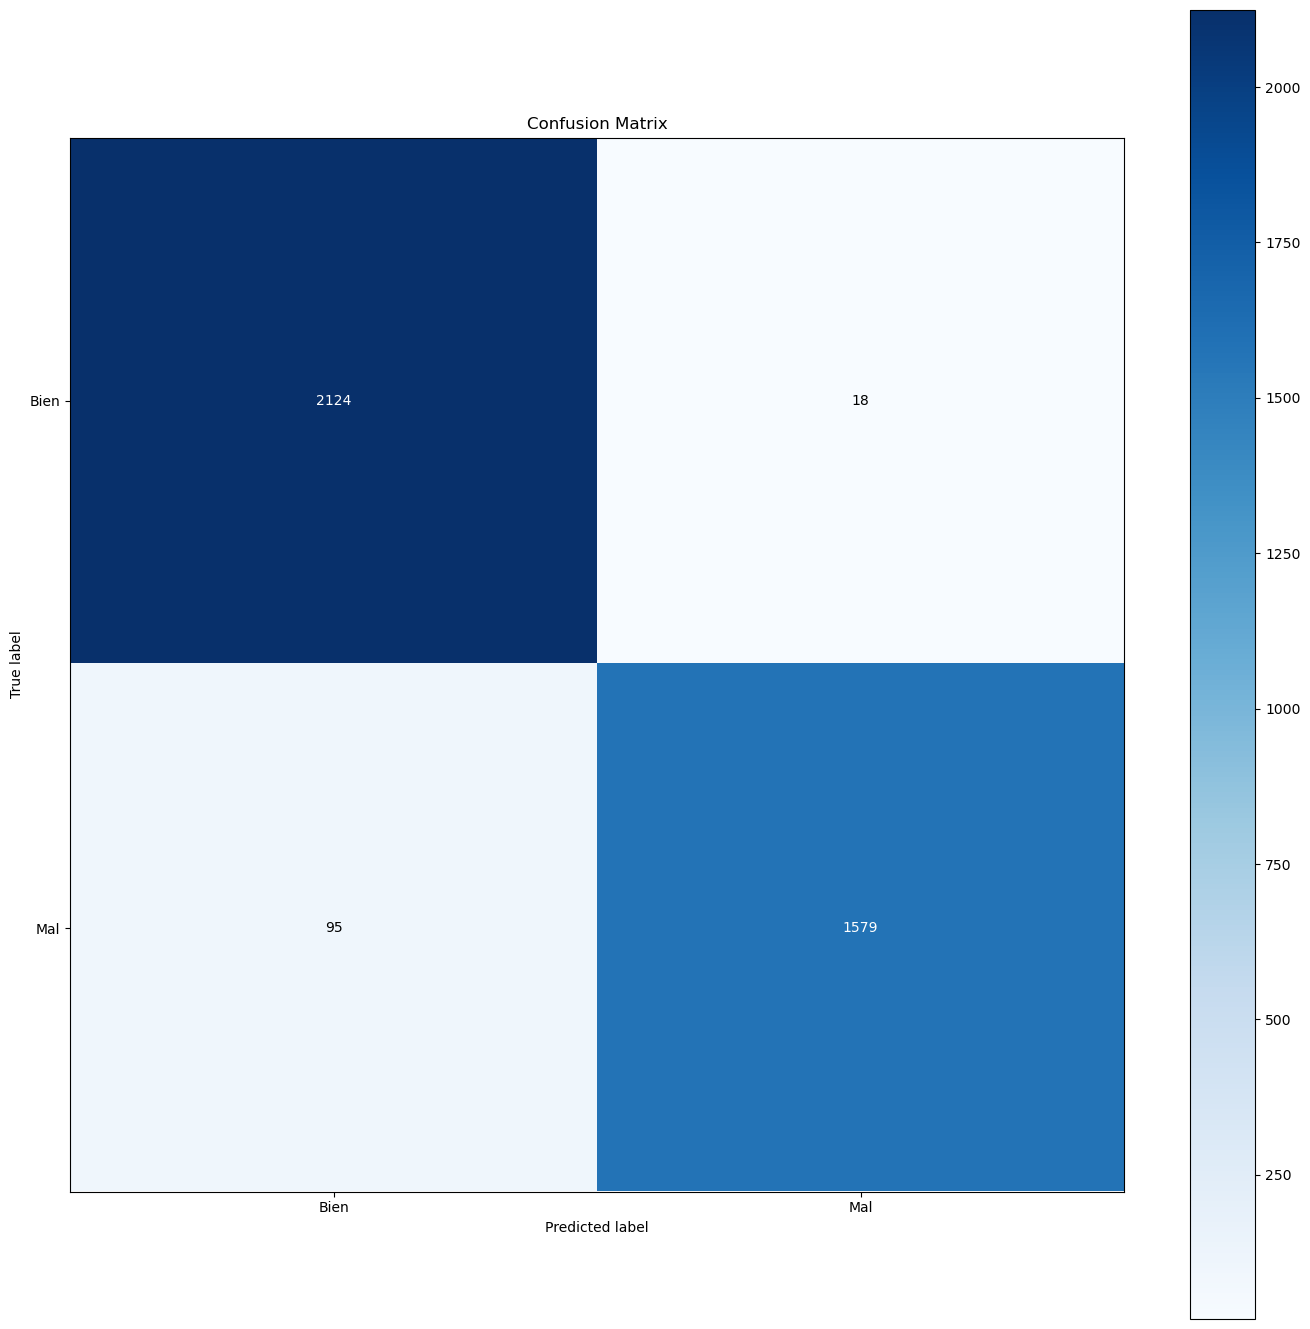

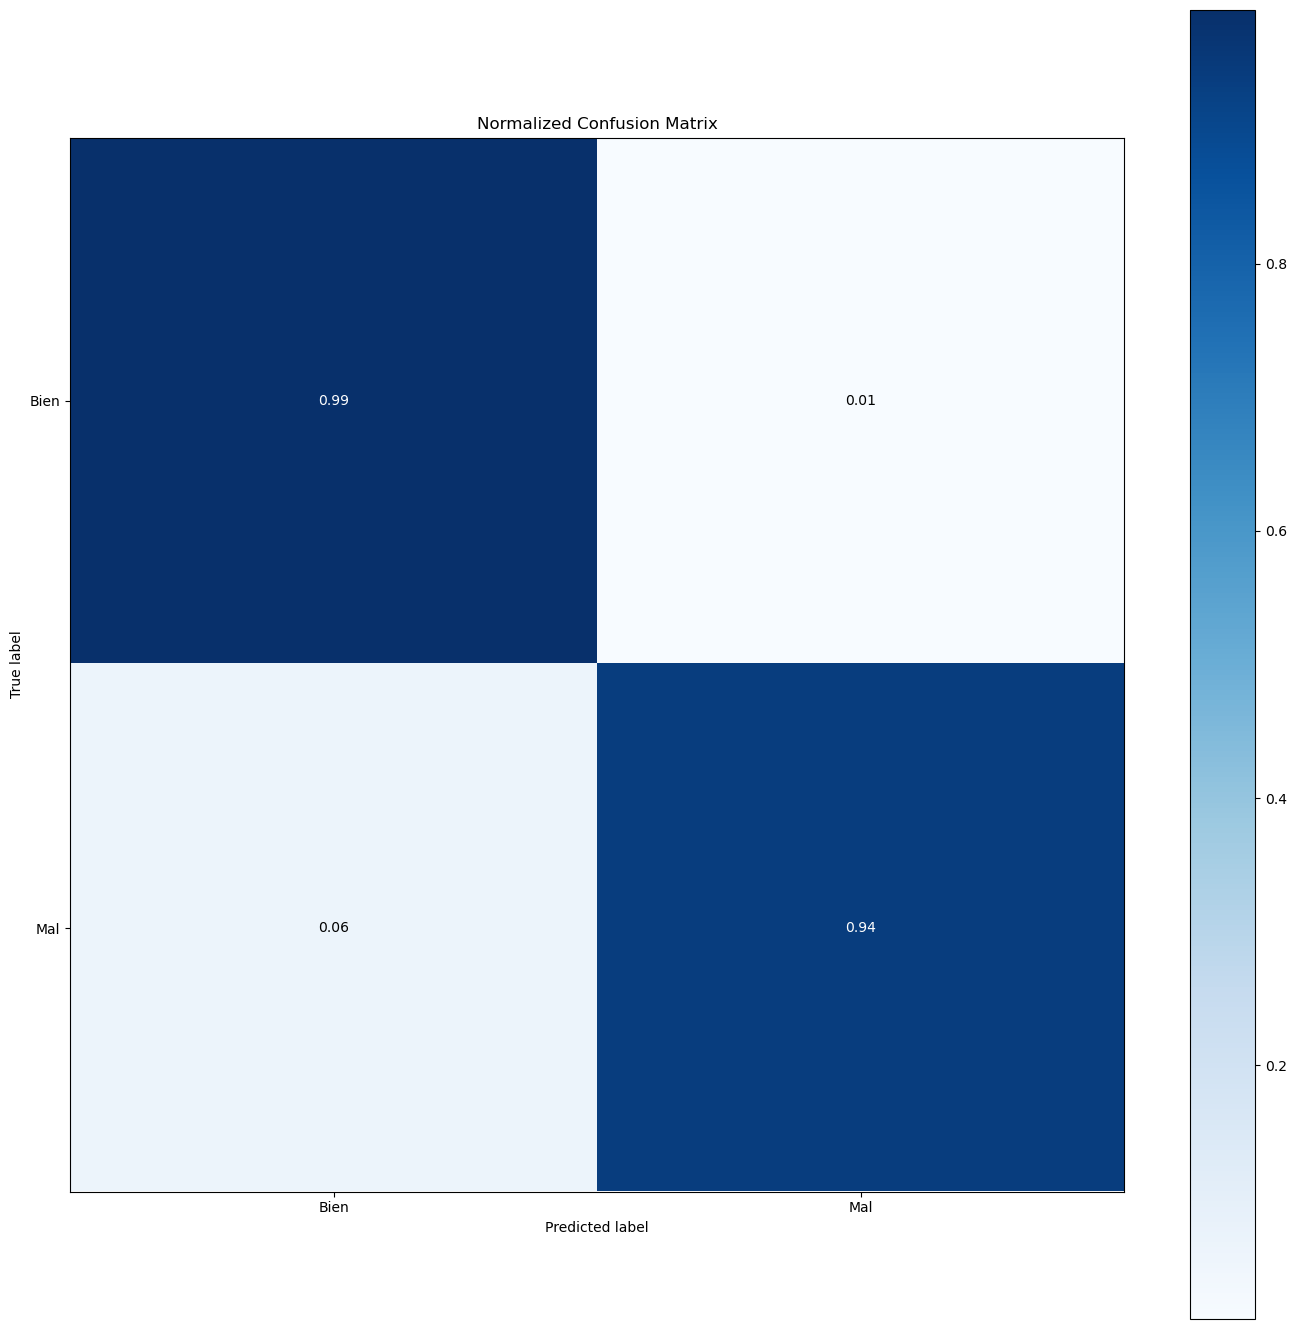

In [119]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (17,17))

In [120]:
# evaluate the model
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_testArr)
LabelsArr = np.array(Labels1)
Labels
LabelsArr

y_test1_text = []
for i in range(0, Y_test.size):
    for j in range(0, LabelsArr.size):
        if Y_test[i] == j:
            y_test1_text.append(Labels[j])

y_pred_text = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_pred_text.append(Labels[j])
            


In [121]:
print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

              precision    recall  f1-score   support

        Bien  0.94548872 0.98821218 0.96637848       509
         Mal  0.96103896 0.83615819 0.89425982       177

    accuracy                      0.94897959       686
   macro avg  0.95326384 0.91218519 0.93031915       686
weighted avg  0.94950096 0.94897959 0.94777061       686



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

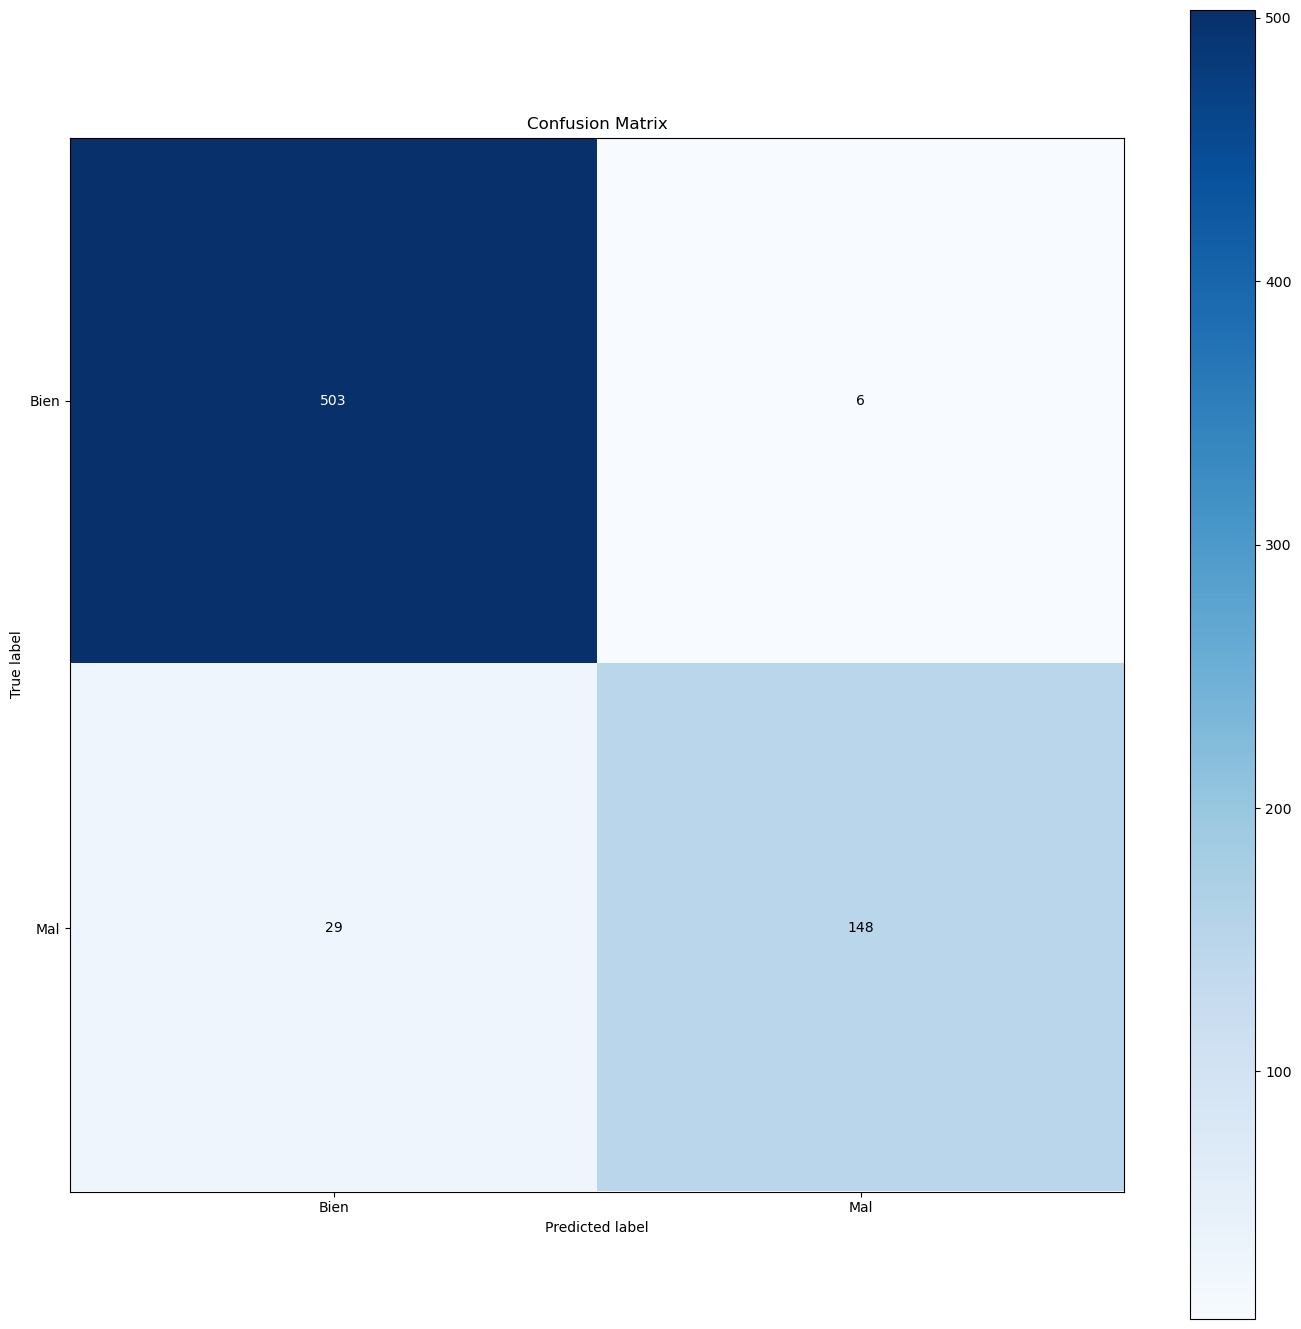

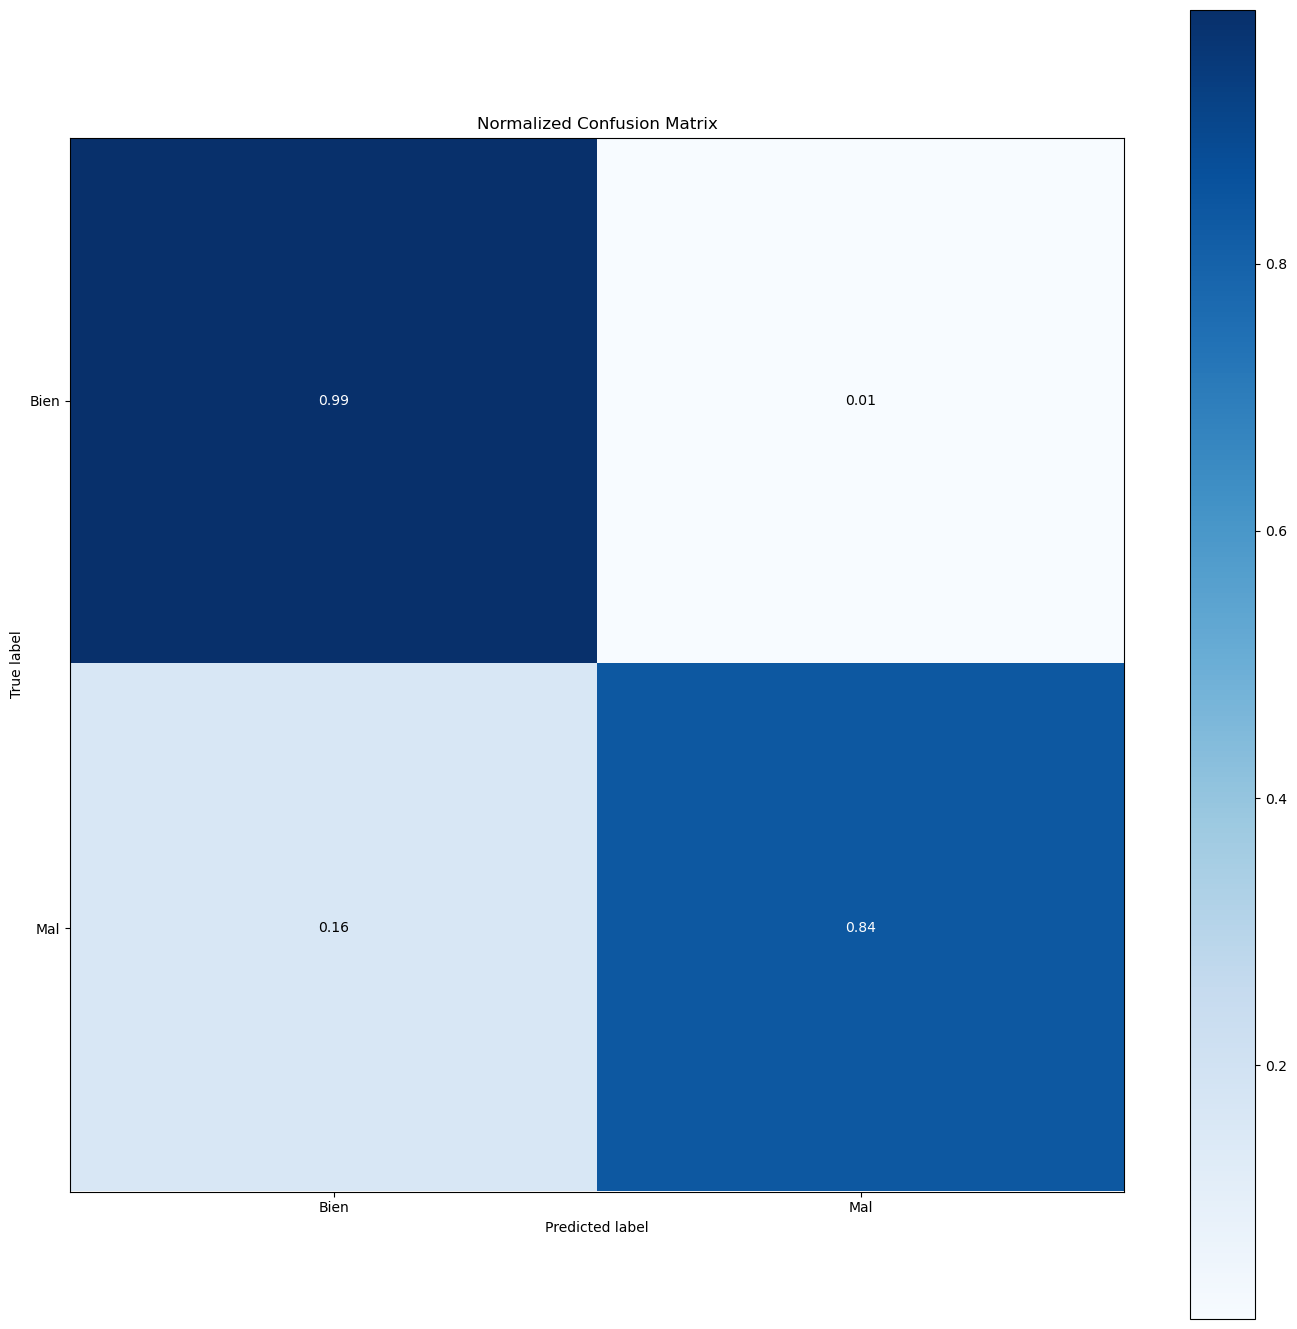

In [122]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (17,17))



In [123]:
size=200
data=shap.sample(X_trainArr, size)
explainer = shap.KernelExplainer(model.predict,data)
expected_value = explainer.expected_value
data1=shap.sample(X_testArr, size)
shap_values = explainer.shap_values(data1,nsamples=size)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [124]:
#np.savetxt('testV3.1.txt',shap_values)


#shap_values = np.loadtxt('testV3.1.txt')
print(shap_values.shape)

(200, 77)


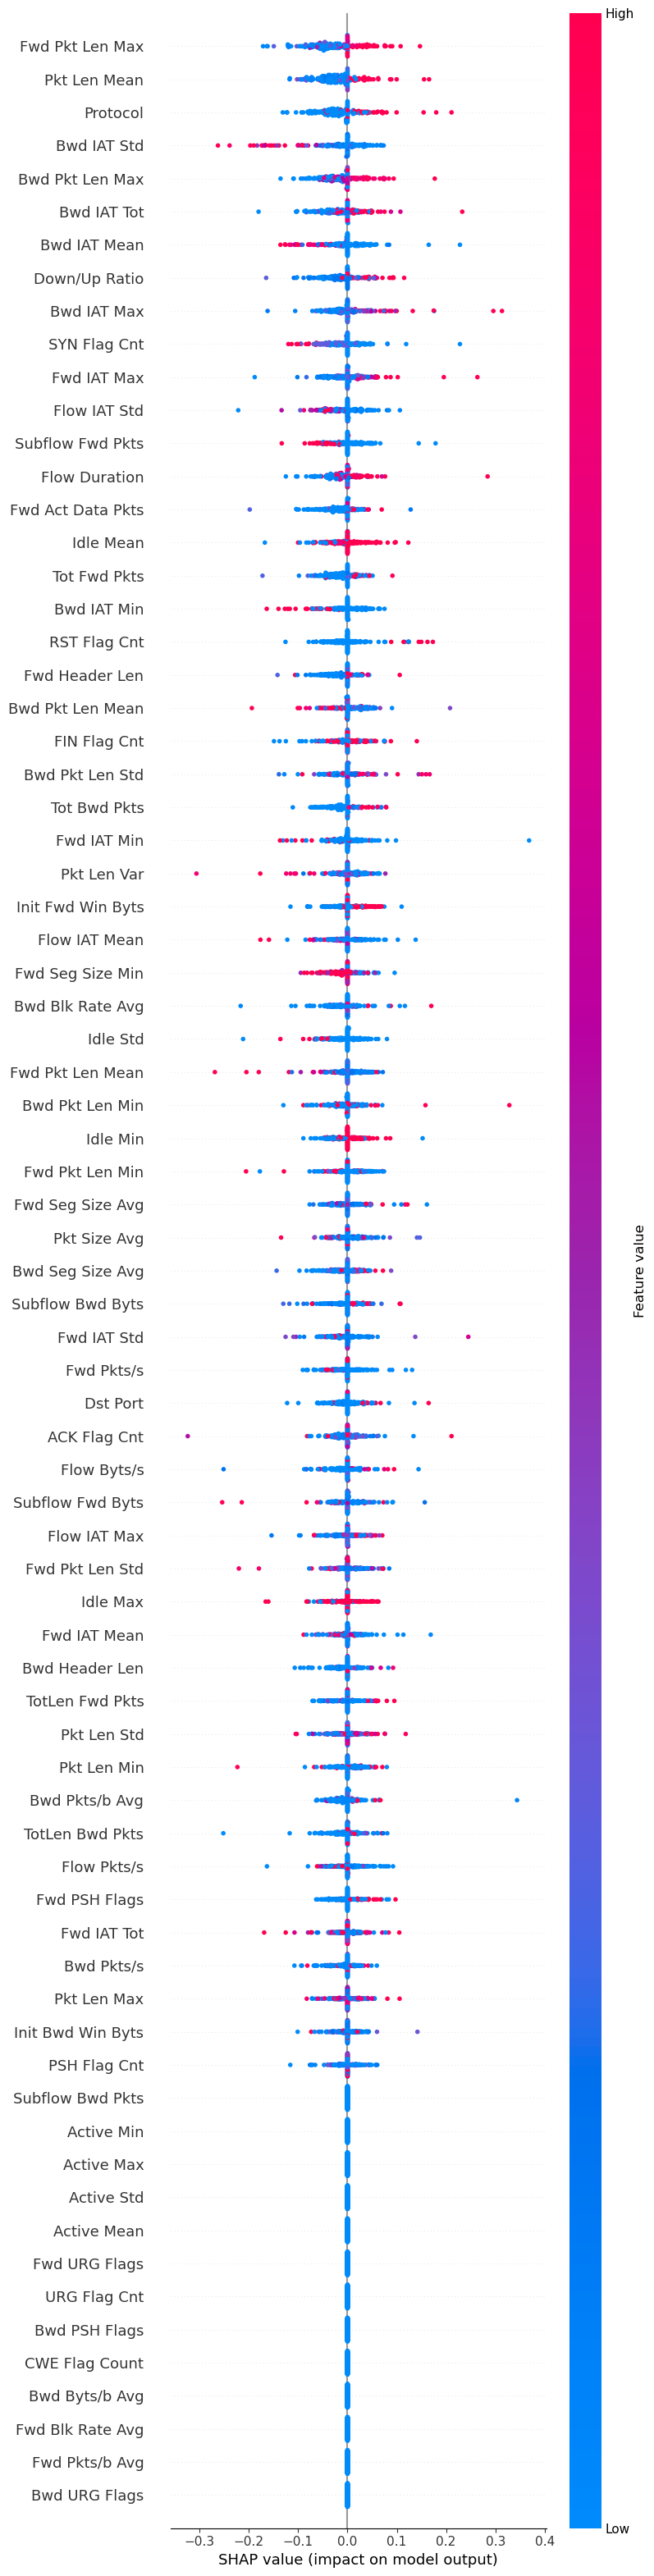

In [125]:
shap.summary_plot(shap_values,data1,feature_names=features, max_display=75)

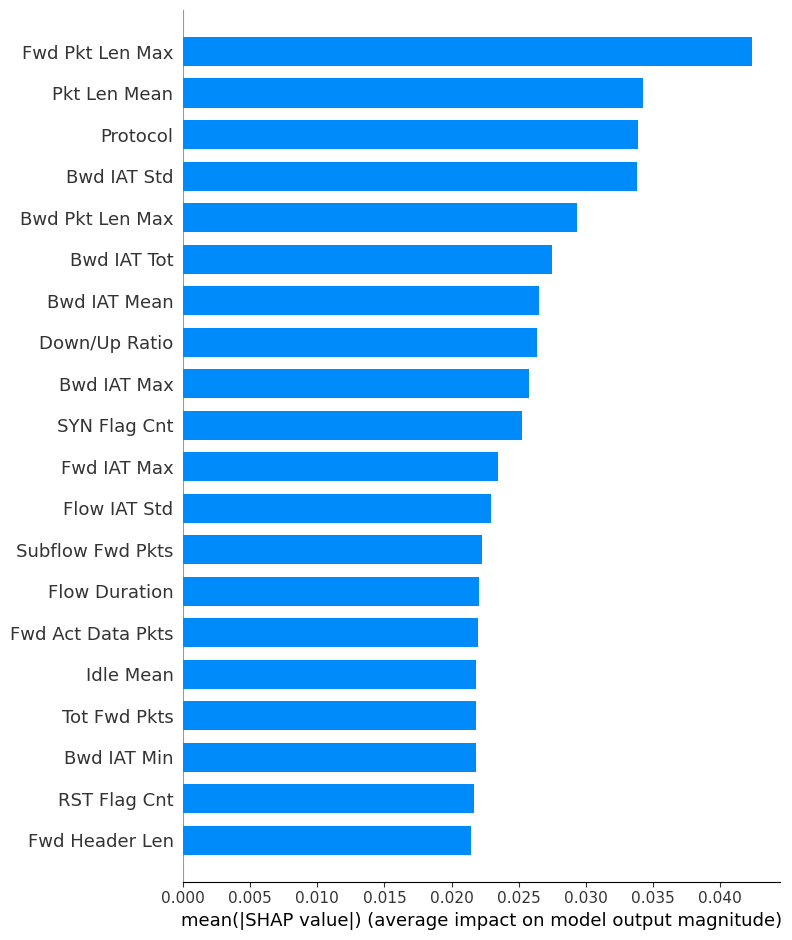

In [126]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = features)

count    3816.000000
mean        0.138889
std         0.345876
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Fwd PSH Flags, dtype: float64


(0.0, 2.0)

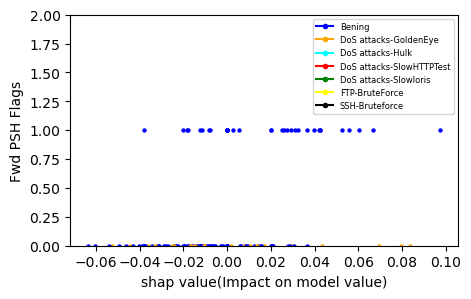

In [127]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#Fwd Seg Size Min,Bwd Pkt Len Std, Fwd Pkt Len Std,Fwd PSH flags,SYN Flag Cnt, Pkt Len Var
#caracteristica='Fwd Header Len'
caracteristica="Fwd PSH Flags"
pos=np.char.find(features,caracteristica, start=0, end=None)
pos =np.where(pos == 0)
pos = int(pos[0])
plt.rcParams["figure.figsize"] = (5,3)
y_preddata=model.predict(data1)

col =[]
x=shap_values[:,pos]
y= data1[:,pos]
for i in range(0, len(data1[:,pos])):
    if y_preddata[i]==0:
        col.append('blue')  
    elif y_preddata[i]==1:
        col.append('orange') 
    elif y_preddata[i]==2:
        col.append('cyan') 
    elif y_preddata[i]==3:
        col.append('red') 
    elif y_preddata[i]==4:
        col.append('green') 
    elif y_preddata[i]==5:
        col.append('yellow') 
    elif y_preddata[i]==6:
        col.append('black')
  

for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 10,linewidth = 0)

plt.ylabel(caracteristica) 
plt.xlabel('shap value(Impact on model value)') 
custom_lines = [Line2D([0], [0], marker='o', color='b',      label='Bening', markersize=3),
                Line2D([0], [0], marker='o', color='orange', label='DoS attacks-GoldenEye', markersize=3),
                Line2D([0], [0], marker='o', color='cyan',   label='DoS attacks-Hulk', markersize=3),
                Line2D([0], [0], marker='o', color='red',    label='DoS attacks-SlowHTTPTest', markersize=3),
                Line2D([0], [0], marker='o', color='green',  label='DoS attacks-Slowloris', markersize=3),
                Line2D([0], [0], marker='o', color='yellow', label='FTP-BruteForce', markersize=3),
                Line2D([0], [0], marker='o', color='black',  label='SSH-Bruteforce', markersize=3),
               ]


plt.legend(handles= custom_lines,loc="best", prop={'size': 6})
print(dataset[caracteristica].describe())
plt.ylim([0, 2])

(0.0, 1000.0)

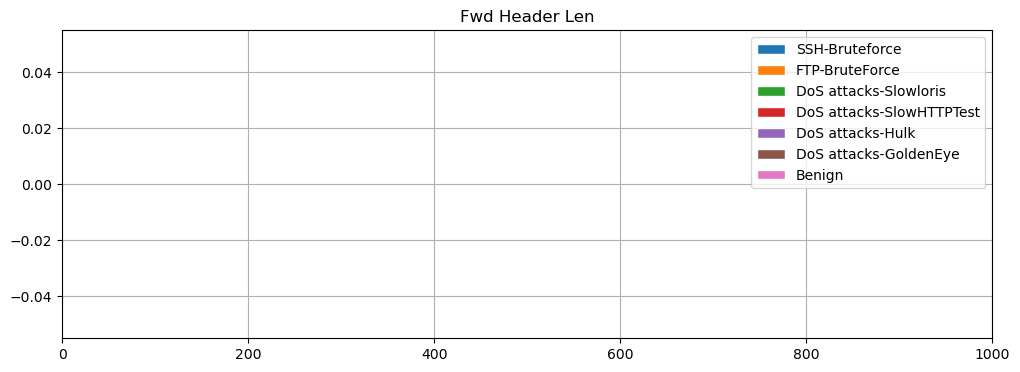

In [128]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce'

caracteris= 'Fwd Header Len'
#fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True,figsize=(12,4))
lim=1000
ylim=20000

pruebadf=dataset.loc[dataset[caracteris] < lim]
#brutedf=pruebadf.loc[pruebadf['Label'] == "SSH-Bruteforce"]
#Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


#pruebadf.hist(column=caracteris, ax = ax[0][0],bins = bin)
#brutedf.hist(column=caracteris, ax = ax[0][1],color="red",bins = bin)
#Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)

#fig , ax =plt.subplots(nrows=1, ncols=1,figsize=(12,4))

#ax[0].hist(pruebadf['Fwd Header Len'],
#          edgecolor='white',
#        bins=bin)

#ax[2].set_title(caracteris+ " en tráfico benigno")
plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'SSH-Bruteforce','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'FTP-BruteForce','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-SlowHTTPTest','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Hulk','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-GoldenEye','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'Benign','Fwd Header Len']],
    stacked=True,
    label=['SSH-Bruteforce', 'FTP-BruteForce', 'DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','DoS attacks-Hulk'
           ,'DoS attacks-GoldenEye','Benign'],
    edgecolor='white',
    bins = bin,
    )

plt.legend()
plt.grid()
plt.title(caracteris)
plt.xlim([0, lim])
#fig.savefig("Fwd_header_len.pdf")

count    3.816000e+03
mean     7.015390e+07
std      4.963996e+07
min      0.000000e+00
25%      1.674593e+07
50%      9.467756e+07
75%      1.181583e+08
max      1.200000e+08
Name: Flow Duration, dtype: float64


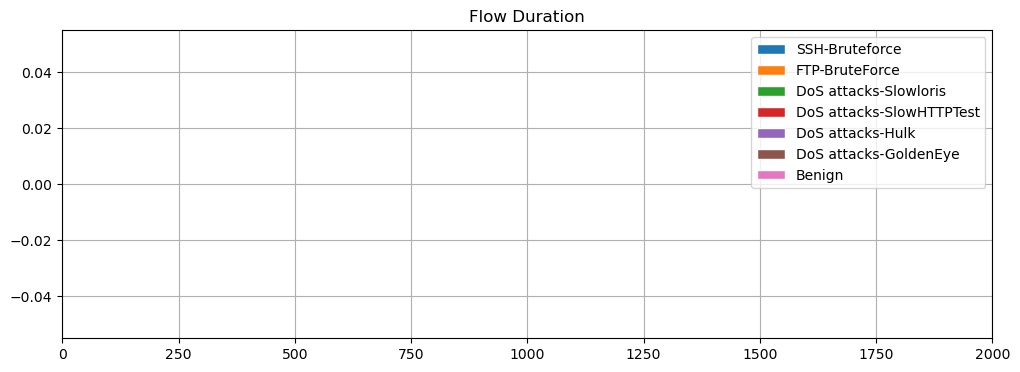

In [129]:
caracteris= 'Flow Duration'

lim=2000
pruebadf=dataset.loc[dataset[caracteris] < lim]
print(dataset[caracteris].describe())
bin = 40

plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'SSH-Bruteforce',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'FTP-BruteForce',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-SlowHTTPTest',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Hulk',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-GoldenEye',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'Benign',caracteris]],
    stacked=True,
    label=['SSH-Bruteforce', 'FTP-BruteForce', 'DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','DoS attacks-Hulk'
           ,'DoS attacks-GoldenEye','Benign'],
    edgecolor='white',
    bins = bin,
    )

plt.legend()
plt.grid()
plt.title(caracteris)
plt.xlim([0, lim])
plt.savefig("Flow Duration2.pdf")

(0.0, 1000.0)

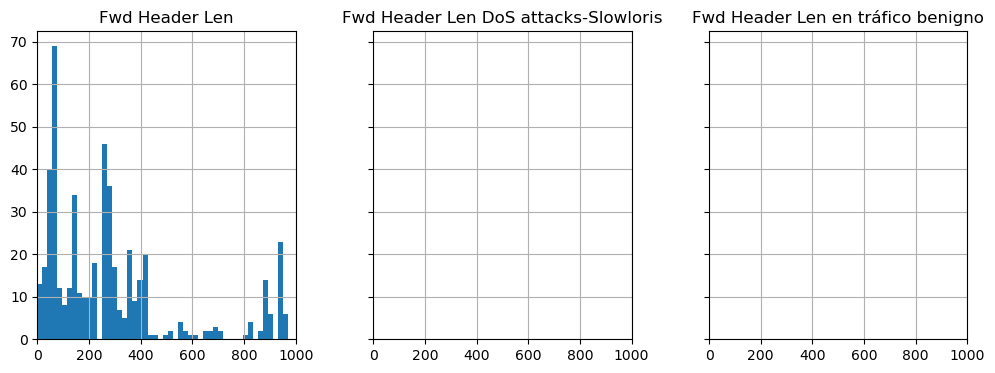

In [130]:
#Histograma del FWdSigSezSize

caracteris= 'Fwd Header Len'
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(12,4))
lim=1000

pruebadf=dataset1.loc[dataset1[caracteris] < lim]
evildf=pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris']
Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


pruebadf.hist(column=caracteris, ax = ax[0],bins = bin)
evildf.hist(column=caracteris, ax = ax[1],color="red",bins = bin)
Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)


ax[0].set_title(caracteris )
ax[1].set_title( caracteris+" DoS attacks-Slowloris")
ax[2].set_title(caracteris+ " en tráfico benigno")

ax[0].set_xlim([0, lim])

ax[1].set_xlim([0, lim])

ax[2].set_xlim([0, lim])


In [131]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,data1,feature_names=features, out_names=Labels)
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce' FWD header Len 936, BWD packt Len STD 176, Fwd Pack Len std 166


In [132]:
y_preddata=model.predict(data1)


In [133]:
num=25;

shap.force_plot(explainer.expected_value, shap_values[num,:]  ,data1[num,:],feature_names=features, figsize=[15,28])
#1 maligno #0 benigno

In [134]:
#feature = [a + ": " + str(int(b)) for a,b in zip(features, data1[num].round(0))]

#shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[num],feature_names=feature, max_display=80)


Mal


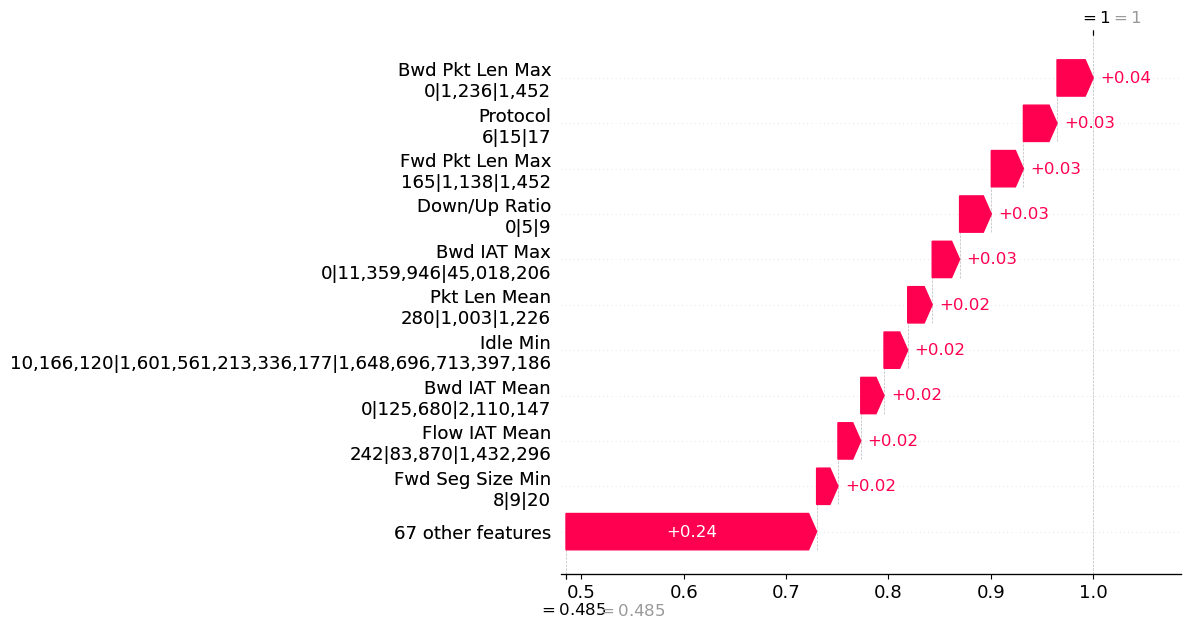

In [136]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce
nuevo_shap=shap_values[0]*0
nuevo_data = data1[0]*0
nuevo_min=data1[0]
nuevo_max=nuevo_data
nuevo_std=nuevo_data

acum=0
ata=1
margen=0.2
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        nuevo_shap=nuevo_shap+shap_values[i]
        nuevo_data=nuevo_data+data1[i]
        nuevo_min =np.minimum(nuevo_min,data1[i])
        nuevo_max =np.maximum(nuevo_max,data1[i])
        acum=acum+1
nuevo_shap=nuevo_shap/acum
nuevo_data=nuevo_data/acum
#Calculo del STD
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        
        nuevo_std= nuevo_std+((data1[i]-nuevo_data)**2)
       
nuevo_std = (nuevo_std/acum)**0.5

#print('{0:,}'.format(int(nuevo_max[1])))
#"|" + '{0:,}'.format(int(e)) 
feature = [a + "\n" + '{0:,}'.format(int(b)) +"|" +'{0:,}'.format(int(c)) +"|" +'{0:,}'.format(int(d))
           for a,b,c,d in zip(features,nuevo_min,nuevo_data,nuevo_max)]
print(Labels[ata])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, nuevo_shap,feature_names=feature, max_display=11)

#shap.summary_plot(shap_values, data1, plot_type="bar", class_names= Labels1, feature_names = features)
#Revisar que significa el explainer expecteed value

In [193]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree


In [194]:
#clf = tree.DecisionTreeClassifier(random_state=0)
n_estimators=200
clf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,max_depth=2)
#    max_features
inicio = time.time()
clf = clf.fit(X_trainArr,Y_train)
fin = time.time()
tiempo_random = fin-inicio
print(tiempo_random)

0.7441146373748779


In [195]:
X_testArr = X_test.to_numpy()
Y_pred=clf.predict(X_trainArr)
LabelsArr = np.array(Labels)

y_testree1 = []
for i in range(0, Y_train.size):
    for j in range(0, LabelsArr.size):
        if Y_train[i] == j:
            y_testree1.append(Labels[j])

y_predtree1 = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_predtree1.append(Labels[j])

In [196]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))
accuracy_modelo=accuracy_score(Y_train, Y_pred)
print(accuracy_modelo)
# 0.91882740 max 5

              precision    recall  f1-score   support

        Bien  0.94878706 0.98599440 0.96703297      2142
         Mal  0.98113208 0.93189964 0.95588235      1674

    accuracy                      0.96226415      3816
   macro avg  0.96495957 0.95894702 0.96145766      3816
weighted avg  0.96297615 0.96226415 0.96214142      3816

0.9622641509433962


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

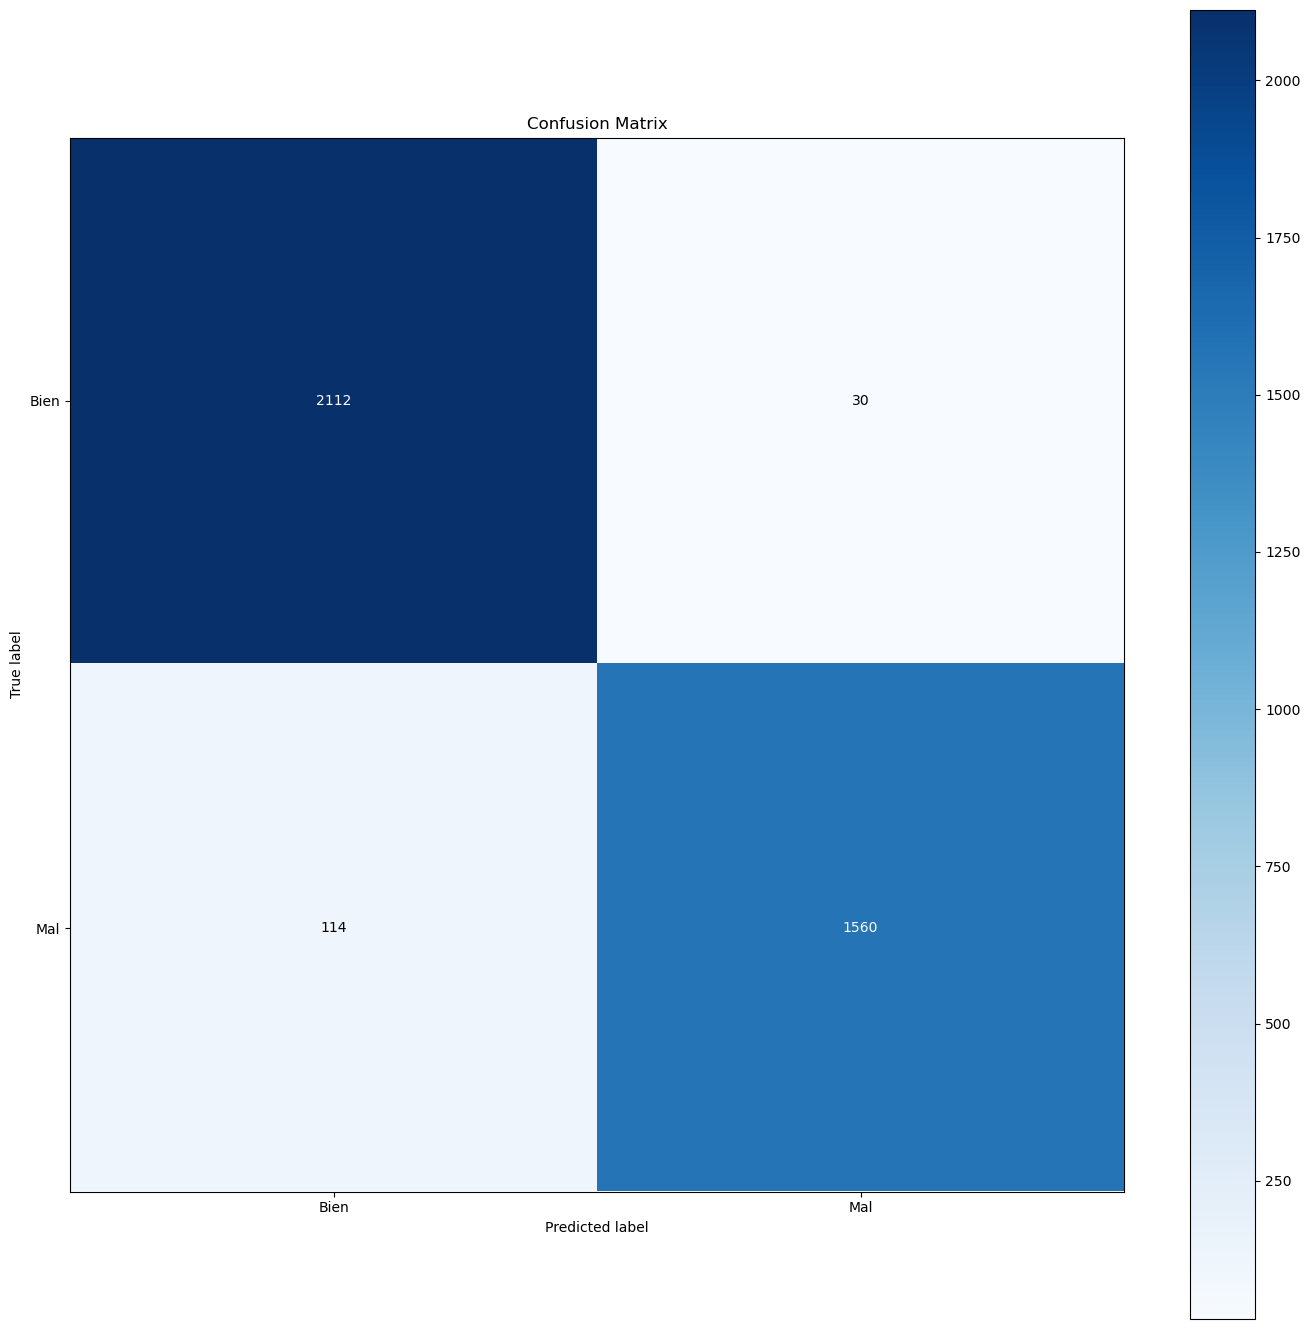

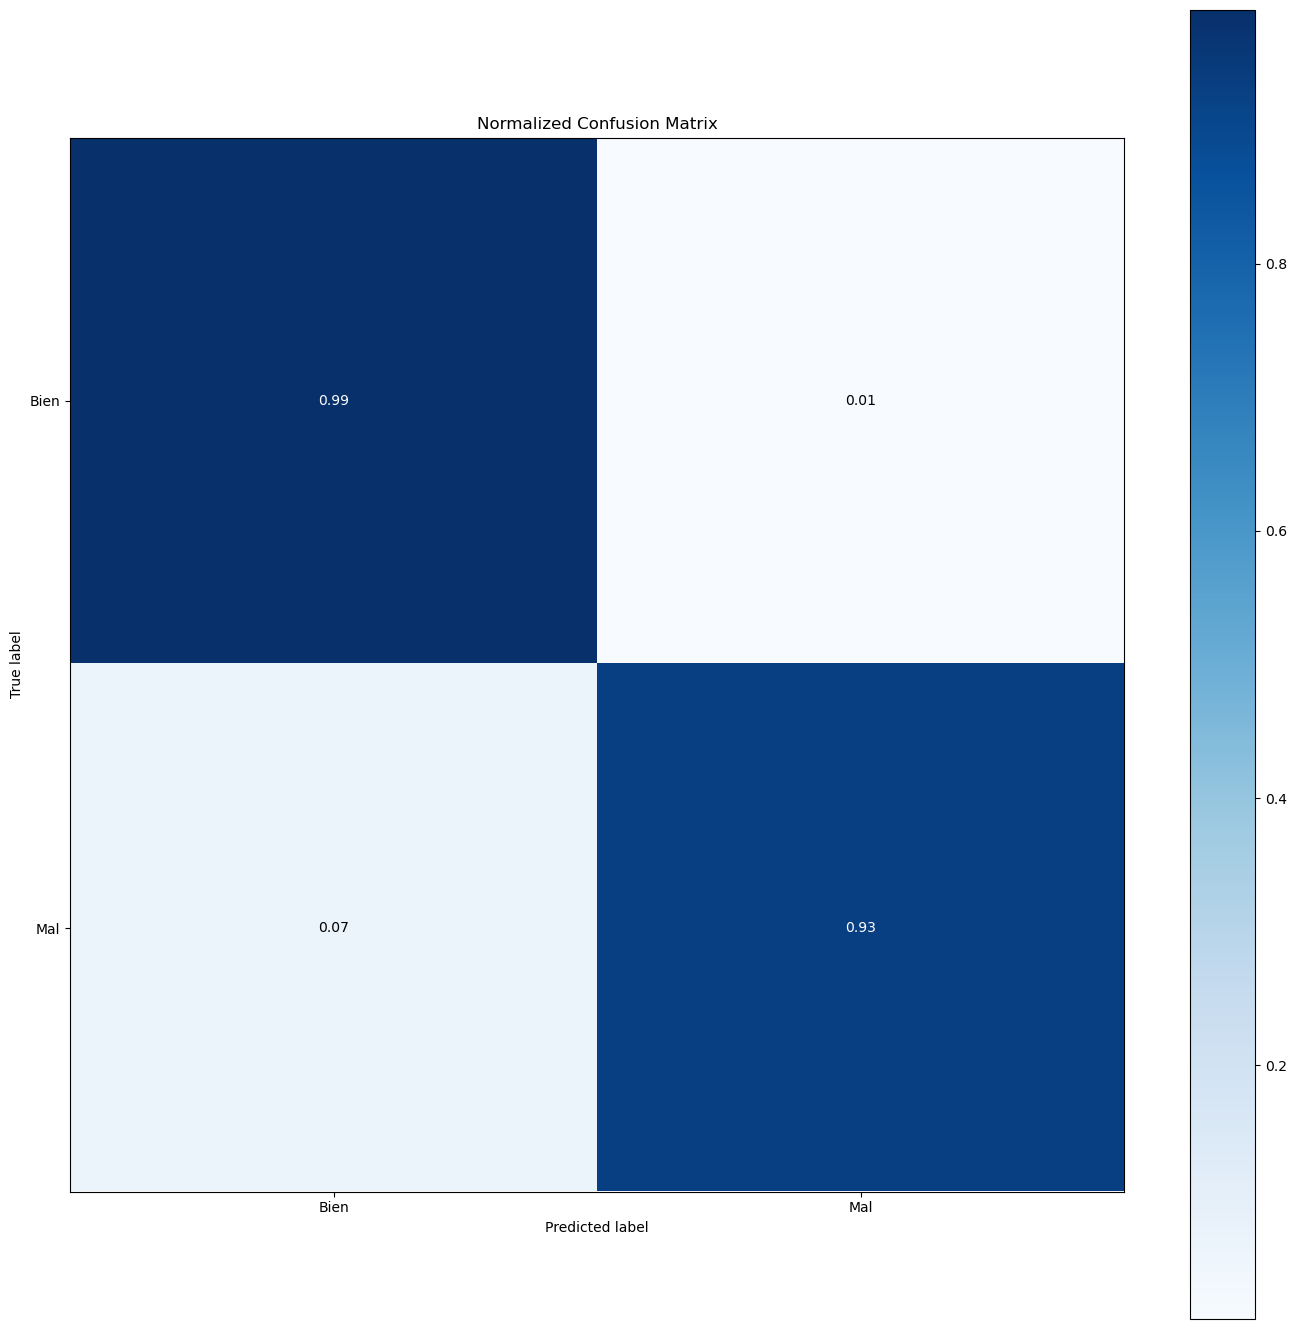

In [197]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1,figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True,figsize= (17,17))

In [198]:
X_testArr = X_test.to_numpy()
Y_pred=clf.predict(X_testArr)
LabelsArr = np.array(Labels1)

y_testree1 = []
for i in range(0, Y_test.size):
    for j in range(0, LabelsArr.size):
        if Y_test[i] == j:
            y_testree1.append(Labels[j])

y_predtree1 = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_predtree1.append(Labels[j])

In [199]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))


              precision    recall  f1-score   support

        Bien  0.95121951 0.99607073 0.97312860       509
         Mal  0.98692810 0.85310734 0.91515152       177

    accuracy                      0.95918367       686
   macro avg  0.96907381 0.92458904 0.94414006       686
weighted avg  0.96043295 0.95918367 0.95816950       686



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

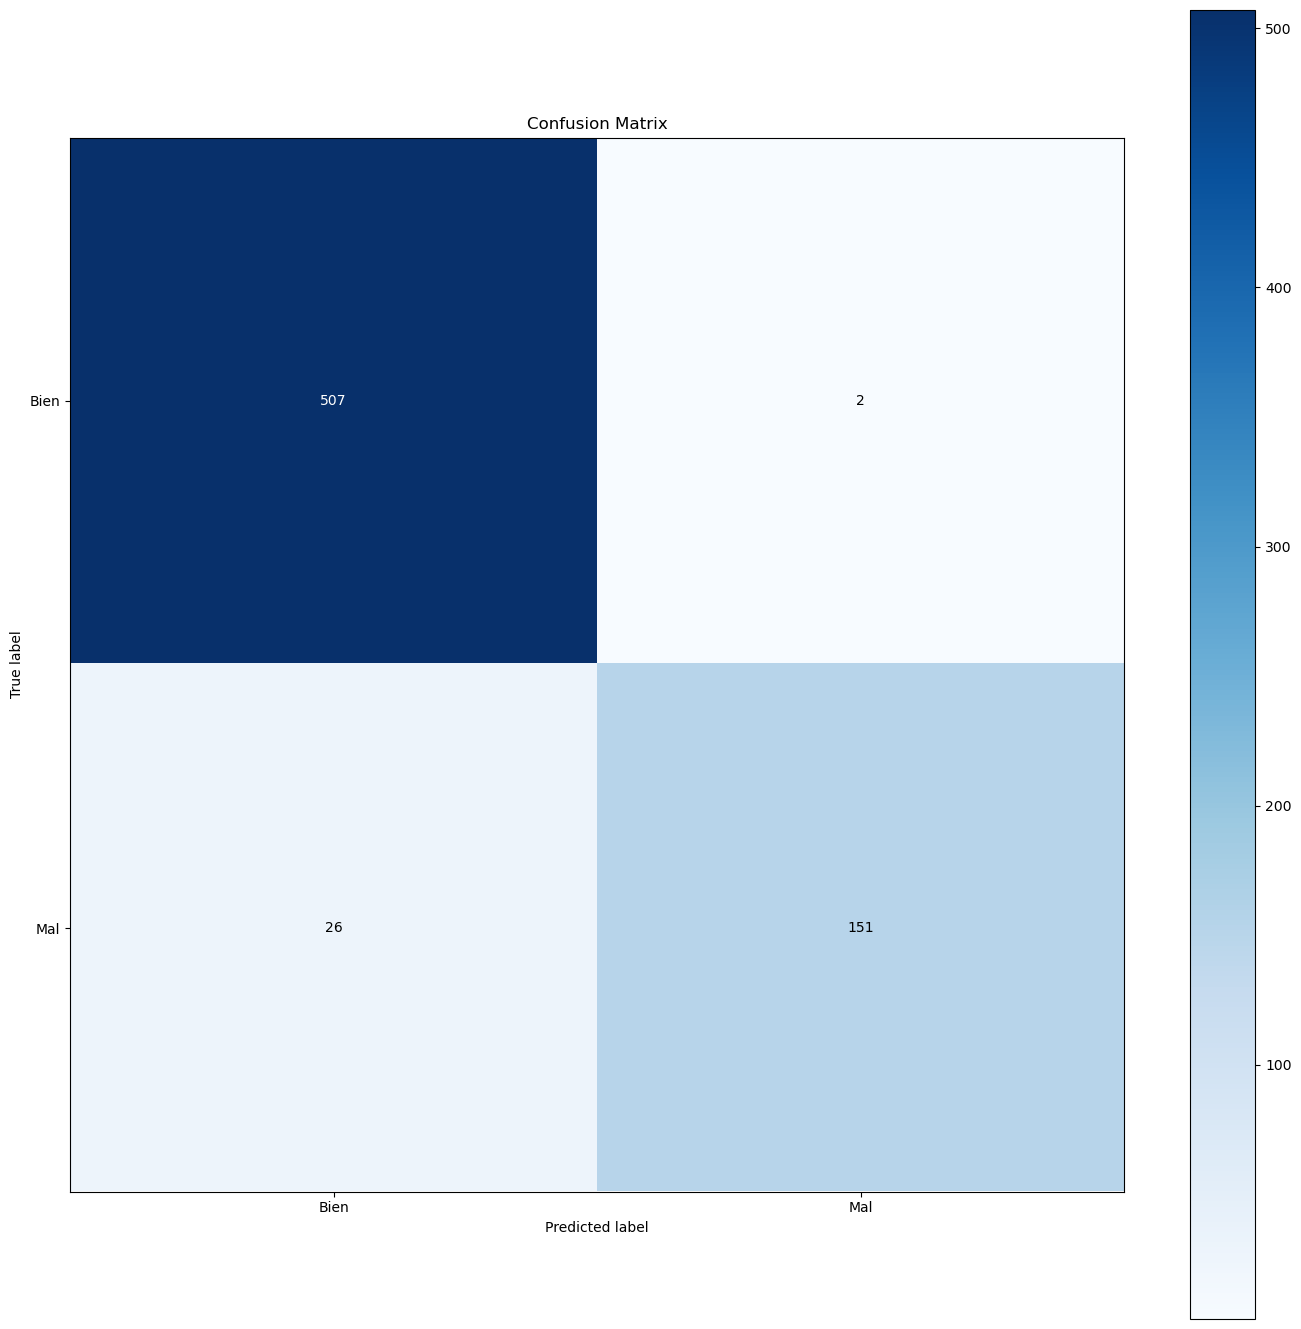

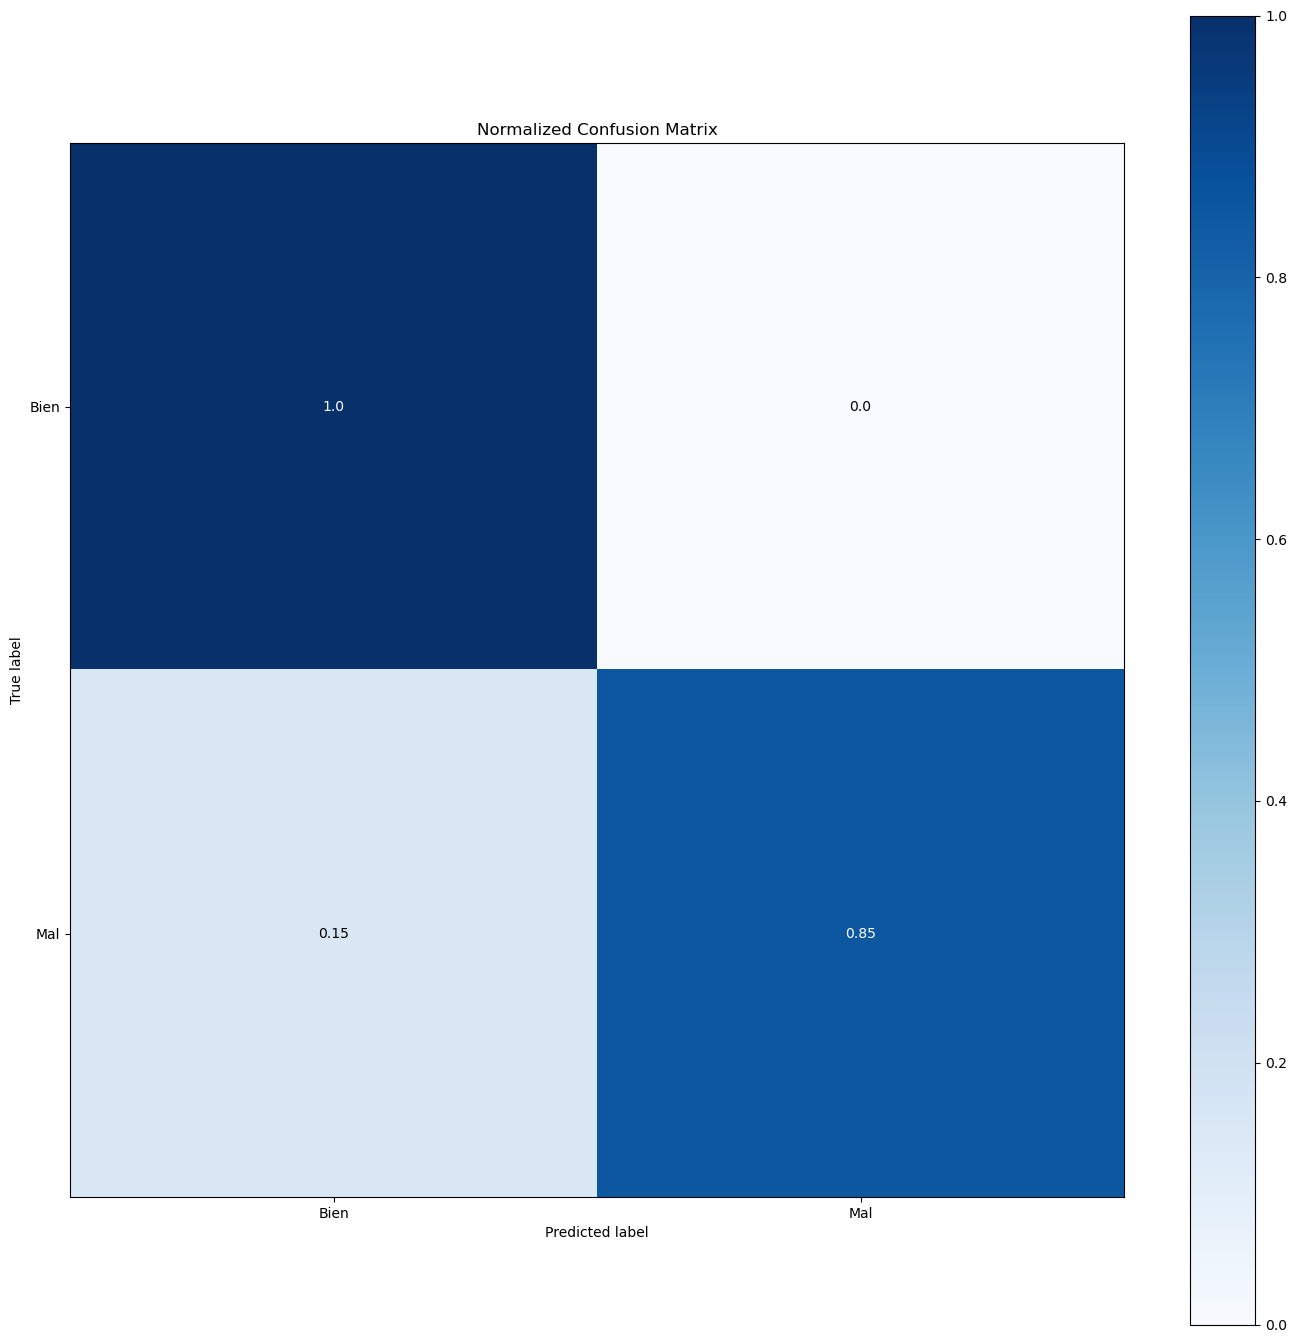

In [200]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1,figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True,figsize= (17,17))

100%|██████████| 200/200 [00:00<00:00, 417.12it/s]


Text(0.5, 0.98, 'Arbol numero: 70 Precision test: 0.964 Precision entrenamiento: 0.963')

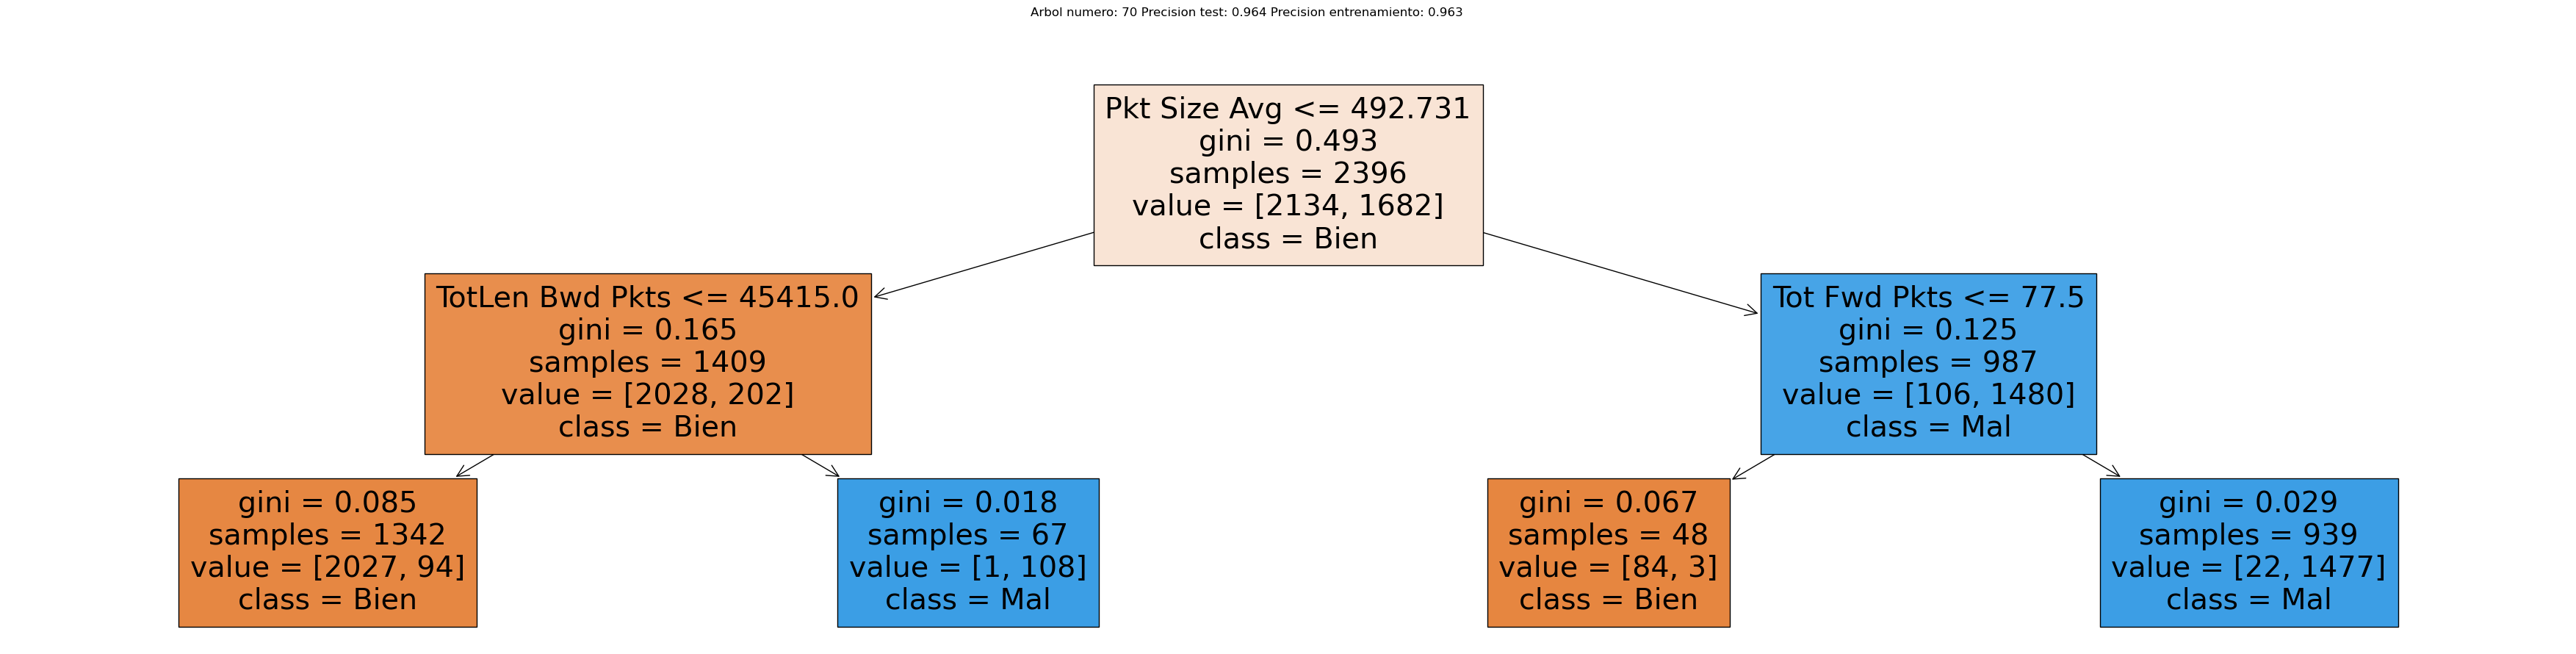

In [201]:
from matplotlib.backends.backend_pdf import PdfPages
accuracy_ant=0
accuracy_med=0
accuracy_pon=0
accuracy_pon_ant=0
best=0
dist_ant=1000
from tqdm import tqdm
for i in tqdm(range(n_estimators)):
    aux_clf = clf.estimators_[i]
    y_pred_train=aux_clf.predict(X_trainArr)
    y_pred_test=aux_clf.predict(X_testArr)
    accuracy=accuracy_score(Y_test, y_pred_test)
    
    accuracy_train=accuracy_score(Y_train, y_pred_train)
    accuracy_pon = accuracy_train*accuracy
    
    dist=abs(accuracy_modelo-accuracy)
    
    if accuracy_pon > accuracy_pon_ant:
        pon=i
        accuracy_pon_ant=accuracy_pon
        accuracy_pon_train = accuracy_train
        accuracy_pon_test = accuracy
        
    if accuracy > accuracy_ant:
        best = i
        accuracy_ant=accuracy
        
    if dist < dist_ant:
        med = i
        accuracy_med=accuracy
        dist_ant = dist


fig3 = plt.figure(figsize=(45,10))
_ = tree.plot_tree(clf.estimators_[pon], feature_names=features,  class_names=Labels,filled=True)



fig3.suptitle('Arbol numero: '+str(pon)+' Precision test: '+ str(round(accuracy_pon_test,3)) +' Precision entrenamiento: '+ str(round(accuracy_pon_train,3)))
#fig3.savefig("decistion_ataques_pon.pdf")

invalid value encountered in true_divide


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

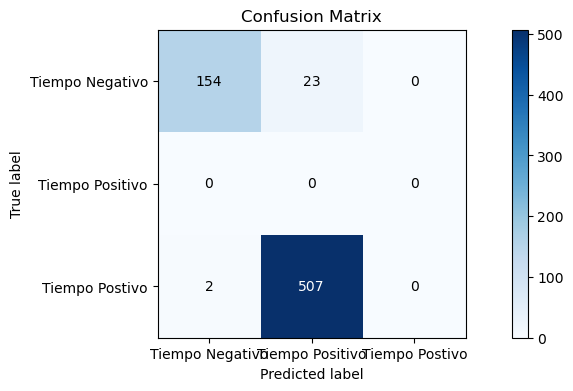

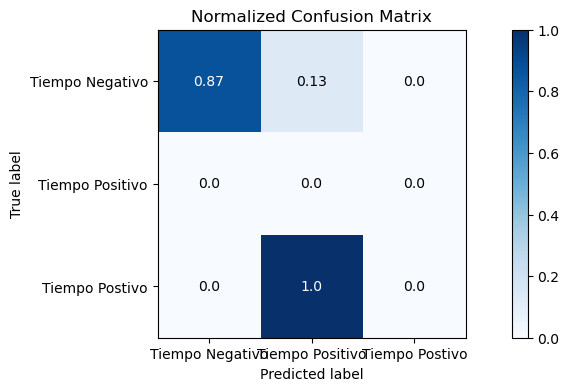

In [202]:
tree = clf.estimators_[pon]
#    max_features
arbol_pon=clf.estimators_[pon]
Y_predtree=arbol_pon.predict(X_testArr)
LabelsArr = np.array(Labels)
y_testree1 = []
for i in range(0, Y_test.size):
        if Y_test[i] == 1:
            y_testree1.append("Tiempo Negativo")
        else:
            y_testree1.append("Tiempo Postivo")
y_predtree1 = []
for i in range(0, Y_predtree.size):
        if Y_predtree[i] == 1:
            y_predtree1.append("Tiempo Negativo")
        else:
            y_predtree1.append("Tiempo Positivo")
            
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1)
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True)



In [159]:
Y_pred_test=tree.predict(X_trainArr)
accuracy=accuracy_score(Y_train, Y_pred_test)
print("precision entrenamiento",accuracy)
y_pred_test=tree.predict(X_testArr)
accuracy=accuracy_score(Y_test, y_pred_test)
print("precision test",accuracy)



precision entrenamiento 0.9614779874213837
precision test 0.9606413994169096


In [160]:
fig2 = plt.figure(figsize=(45,10))
_ = tree.plot_tree(model, feature_names=features,  class_names=Labels,filled=True)

fig.suptitle('Arbol numero: normal '+' Precision: '+ str(round(accuracy,3)))
#fig.savefig("decistion_tree_normal_ataque.pdf")

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

<Figure size 4500x1000 with 0 Axes>